# Remove Background

Removing the background from the cat images will allow seamless blending of the gradients for the Poisson blending algorithm.

In [1]:
from rembg import remove
from PIL import Image
import matplotlib.pyplot as plt
import os

In [2]:
output_folder = 'poisson-masks'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

Context leak detected, CoreAnalytics returned false
Context leak detected, CoreAnalytics returned false
Context leak detected, CoreAnalytics returned false
Context leak detected, CoreAnalytics returned false
Context leak detected, CoreAnalytics returned false
Context leak detected, CoreAnalytics returned false
Context leak detected, CoreAnalytics returned false
Context leak detected, CoreAnalytics returned false
Context leak detected, CoreAnalytics returned false
Context leak detected, CoreAnalytics returned false
Context leak detected, CoreAnalytics returned false
Context leak detected, CoreAnalytics returned false
Context leak detected, CoreAnalytics returned false
Context leak detected, CoreAnalytics returned false
Context leak detected, CoreAnalytics returned false
Context leak detected, CoreAnalytics returned false
Context leak detected, CoreAnalytics returned false
Context leak detected, CoreAnalytics returned false
Context leak detected, CoreAnalytics returned false
Context leak

IndexError: index 10 is out of bounds for axis 0 with size 10

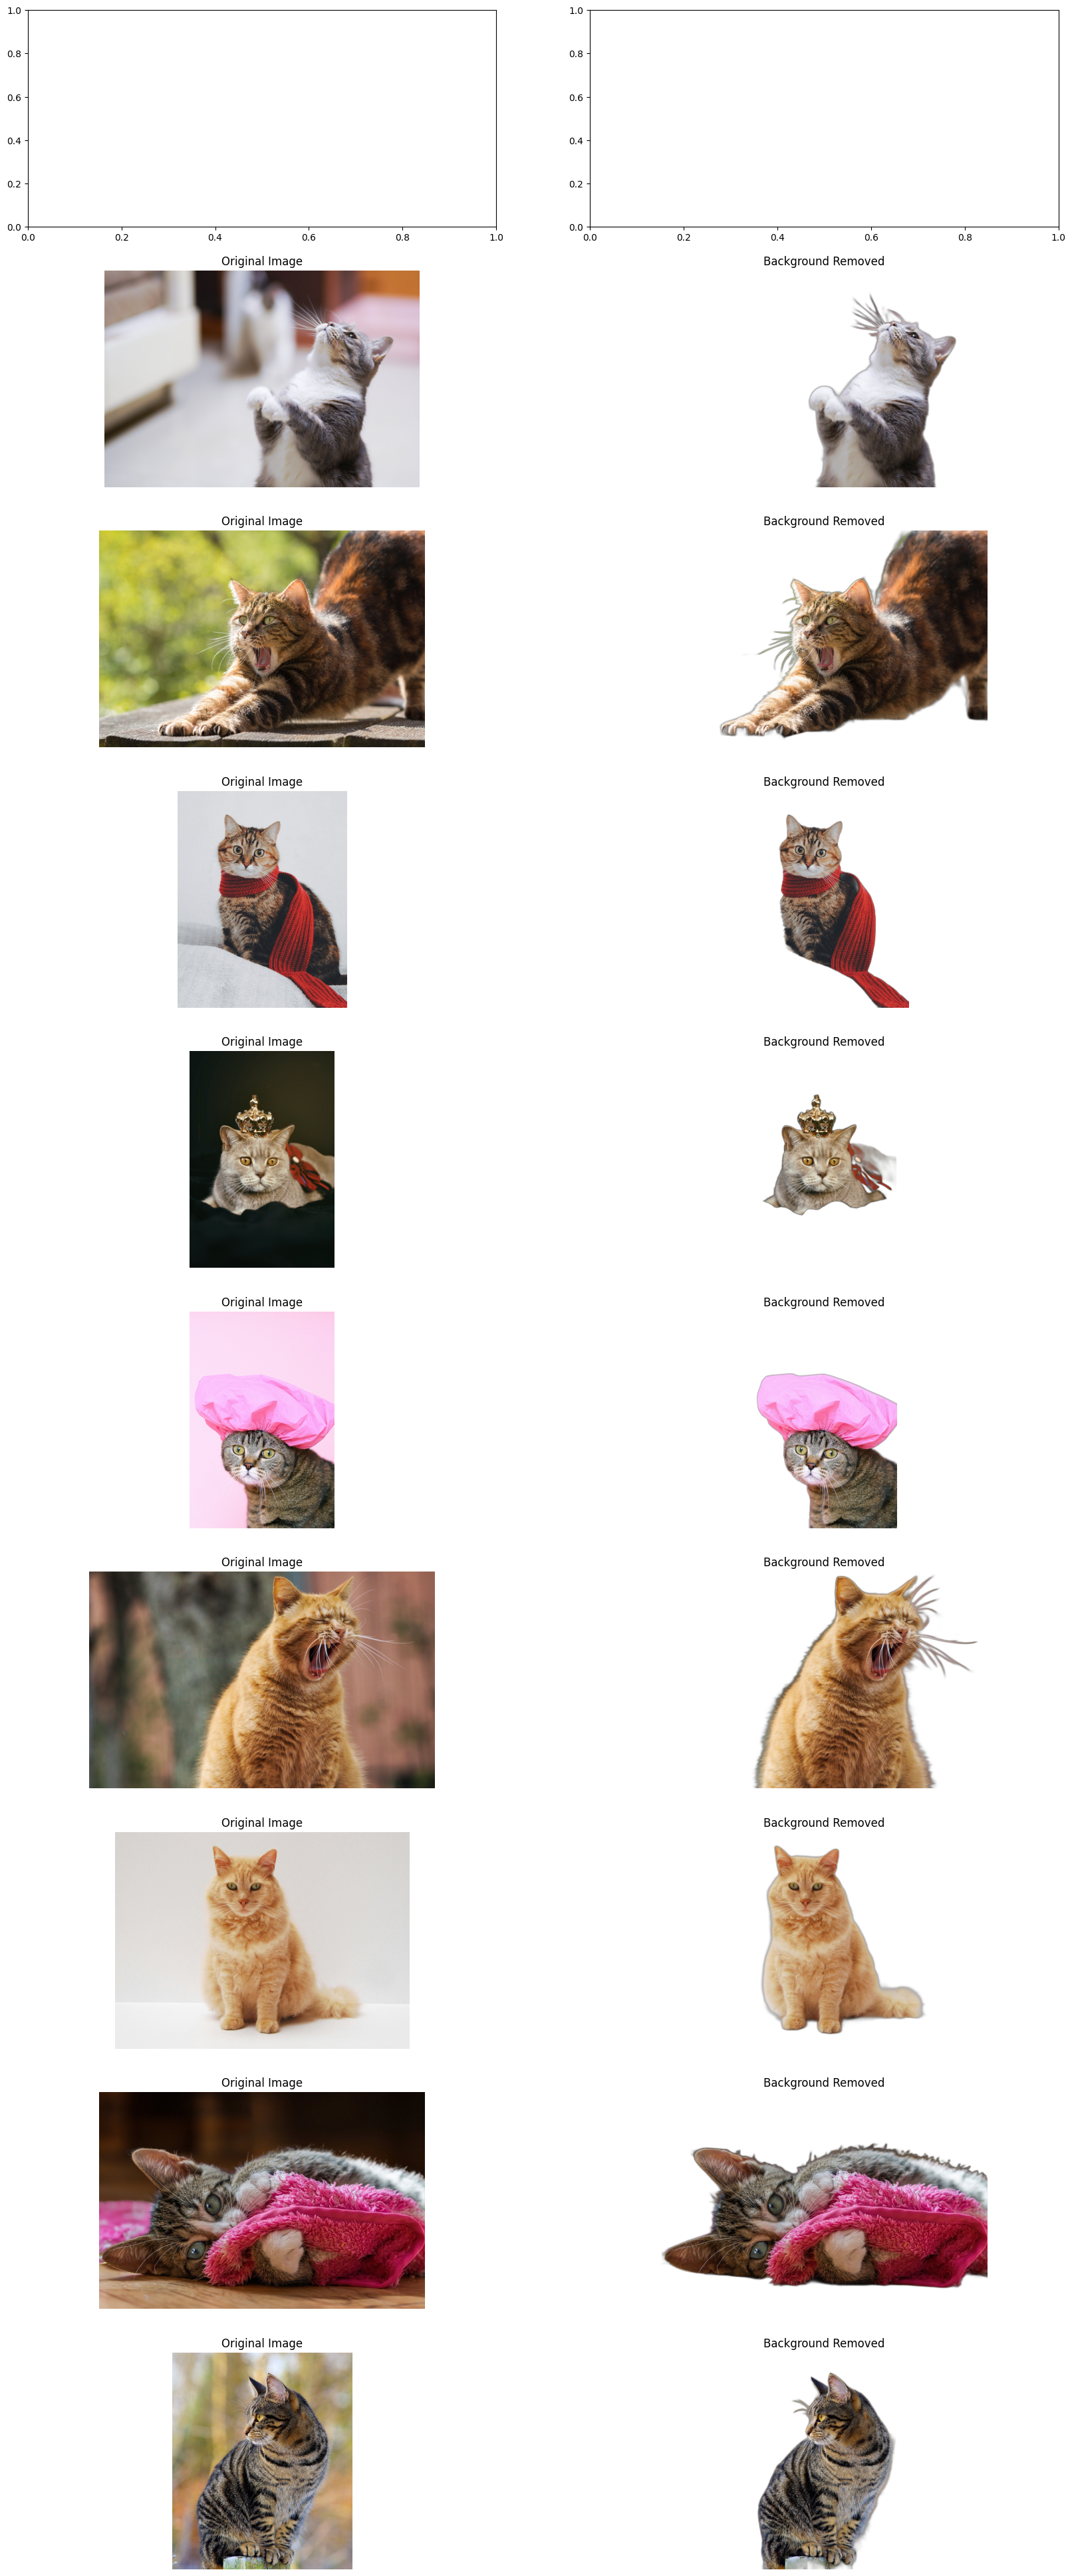

In [13]:
import io
input_folder = 'poisson-foreground'

# Subplot to display images
fig, axes = plt.subplots(nrows=10,ncols=2, figsize=(20,50))

# Grab each image to remove background
for i, filename in enumerate(os.listdir(input_folder)):
    if filename.endswith(('.jpg','.jpeg','.png')):
        image_path = os.path.join(input_folder, filename)
        # remove background from each image
        with open(image_path, 'rb') as f:
            img_data = f.read()

        img_data_without_bg = remove(img_data)
        img = Image.open(io.BytesIO(img_data_without_bg))
        # Plot original and removed background images
        #fig.suptitle('Original Image vs. Background Removed', fontsize=16)
        original_image = Image.open(image_path)
        axes[i, 0].imshow(original_image)
        axes[i, 0].set_title('Original Image')
        axes[i, 0].set_xticks([])
        axes[i, 0].set_yticks([])
        axes[i, 0].axis('off')

        axes[i, 1].imshow(img)
        axes[i, 1].set_title('Background Removed')
        axes[i, 1].set_xticks([])
        axes[i, 1].set_yticks([])
        axes[i, 1].axis('off')

        # Hide tick lables in subplots
        # for ax in axes:
        #     ax.set_xticks([])
        #     ax.set_yticks([])

        # Save removed background images
        output_path = os.path.join(output_folder, filename)
        rgb_img = img.convert('RGB') # error thrown RGBA -> A = Alpha transparency png image with the bckg removed imgs
        rgb_img.save(output_path)

plt.tight_layout()
plt.savefig('background-removal-result.png')
plt.show()